In [ ]:
#Webscrape https://www.rebellegirls.com/yarnfiber.htm for list of offered brands
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import csv



In [ ]:

url = 'https://api.ravelry.com/patterns/search.json?yarn=Anzula+Haiku'


username = 'read-cd70272bac2a02e72b3d7bdb78e2ced9'
password = 'HH7o1YeWYmBnwPp/jcaQVOud9UkVyxHrX0IB1pau'
    

response=requests.get(url, auth= (username, password))

response

In [ ]:

rav_things=response.json()
patterns= rav_things.get('patterns')
Anzula_Haiku= pd.DataFrame(response.json()['patterns'])

Anzula_Haiku['yarn']= 'Anzula Haiku'

Anzula_Haiku.shape
Anzula_Haiku.columns



In [ ]:
df.to_csv('anzula.csv', mode='a', index= False, header= False)

In [ ]:
def write_json(data, filename= "ravelry_api.json"):
    with open(filename, "w") as f:
        json.dump(data, f, indent=4)

data=(patterns)
write_json(data)

In [ ]:
def append_json(new_data, filename='ravelry_api.json'):
    with open('ravelry_api.json', 'r') as file:
        
        data= json.load(file)
        data['patterns'].append(new_data)
        file.seek(0)
         
        data.update(new_data)
        
    with open('ravelry_api.json', 'a+') as file:
        json.dump(data, file)

In [ ]:
new_data= (requests.request('GET','https://api.ravelry.com/patterns/search.json?yarn=Anzula+Cloud', auth=(username, password)))

append_json()

In [ ]:
with open('ravelry_api.json') as f:
        
    data= json.load(f)
    


print(df)

In [ ]:
new_data= requests.request('GET','https://api.ravelry.com/patterns/search.json?yarn=Anzula+Cloud', auth=(username, password))

In [ ]:
if response.status_code == 200:
    for i in range(1, 400):
        response = requests.get('https://api.ravelry.com/patterns/search.json?yarn={}', auth=(username, password).format(i))
        temp_df = pd.DataFrame(response.json()['results'])
        df = df.append(temp_df, ignore_index=True)
else: 
    print('Error', response.status_code)

In [ ]:
with open('ravelry_api.json') as f:
    data= json.load(f)

patterns= data['patterns']

csv_writer= csv.writer(anzula)

count = 0

for pat in patterns:
    if count == 0:
        header=pat.keys()
        csv_writer.writerow(header)
        count+=1
    
    csv_writer.writerow(pat.values())

anzula.close()

In [106]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
import csv
import numpy as np
import matplotlib.pyplot as plt

In [107]:
projects=pd.read_csv('ravelry_api.csv')
rebelle_list=pd.read_csv('rebelle_webscrape.csv')

In [108]:
projects.columns=['free', 'id', 'name', 'permalink', 'personal_attributes', 'first_photo',
       'designer', 'pattern_author', 'pattern_sources', 'yarn']


In [109]:
projects['pattern_author']= projects['pattern_author'].astype('str')

In [110]:


# new data frame with split value columns
new = projects["pattern_author"].str.split(",", n=5, expand=True)



projects['author']= new[4]

print(projects.shape)
print(projects.columns)


(3015, 11)
Index(['free', 'id', 'name', 'permalink', 'personal_attributes', 'first_photo',
       'designer', 'pattern_author', 'pattern_sources', 'yarn', 'author'],
      dtype='object')


In [111]:
projects=projects.drop(['permalink','personal_attributes', 'first_photo', 'designer','pattern_author', 'pattern_sources'], axis=1)




In [112]:
print(projects.columns)

Index(['free', 'id', 'name', 'yarn', 'author'], dtype='object')


In [113]:
def clean(projects) -> pd.DataFrame:
    projects.columns= projects.columns.str.title()
    projects.columns= projects.columns.str.strip()

    return projects

projects= clean(projects)

In [114]:
projects['Author']=projects['Author'].astype('str')
projects['Author']=projects['Author'].str.strip("'name': '")

projects['Free']=projects['Free'].astype('str')
projects['Free']=projects['Free'].str.replace('False', 'No')
projects['Free']=projects['Free'].str.replace('True', 'Yes')

projects.head(2)

,Free,Id,Name,Yarn,Author
0,No,706936,Puff Stitch Hat,Adriafil Knitcol,Deborah Kah
1,Yes,650697,Toe-Up Worsted Socks,Adriafil Knitcol,Colette Retrosi


In [115]:
rebelle_projects= (pd.merge(rebelle_list, projects, left_on= "Rebelle Stock", right_on= "Yarn"))

rebelle_projects.head(2)

,Rebelle Stock,Free,Id,Name,Yarn,Author
0,Adriafil Knitcol,No,706936,Puff Stitch Hat,Adriafil Knitcol,Deborah Kah
1,Adriafil Knitcol,Yes,650697,Toe-Up Worsted Socks,Adriafil Knitcol,Colette Retrosi


In [127]:
free_patterns= rebelle_projects[rebelle_projects['Free']== 'Yes']
paid_patterns= rebelle_projects[rebelle_projects['Free']== 'No']
free_yarn= pd.DataFrame(free_patterns['Rebelle Stock'].value_counts())
paid_yarn=pd.DataFrame(paid_patterns['Rebelle Stock'].value_counts())
free_yarn.head(2)

,count
Rebelle Stock,
Cascade Pacific,57
Cascade 128 Superwash,44


In [130]:

yarn_sorted=free_yarn.merge(paid_yarn, on='Rebelle Stock', how= 'outer')
yarn_sorted.reset_index()
yarn_sorted.columns

Index(['count_x', 'count_y'], dtype='object')

<Axes: xlabel='Rebelle Stock'>

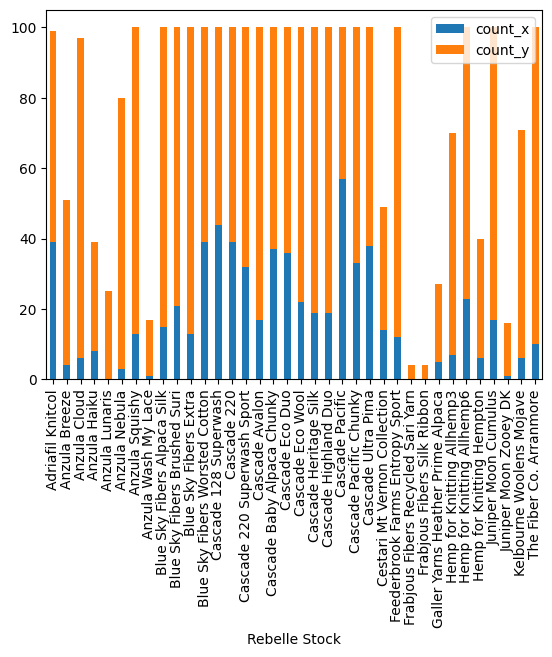

In [133]:
yarn_sorted.plot(kind='bar', stacked=True)
